# package_LAB
## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
import package_LAB

from importlib import reload
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_LAB import LL_RT, PID_RT,IMC_Tuning, FF_RT, LS_Process, Margins, Controller
package_LAB=reload(package_LAB)

# Lead Lag Real Time : LL_RT()

In [2]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        
    
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

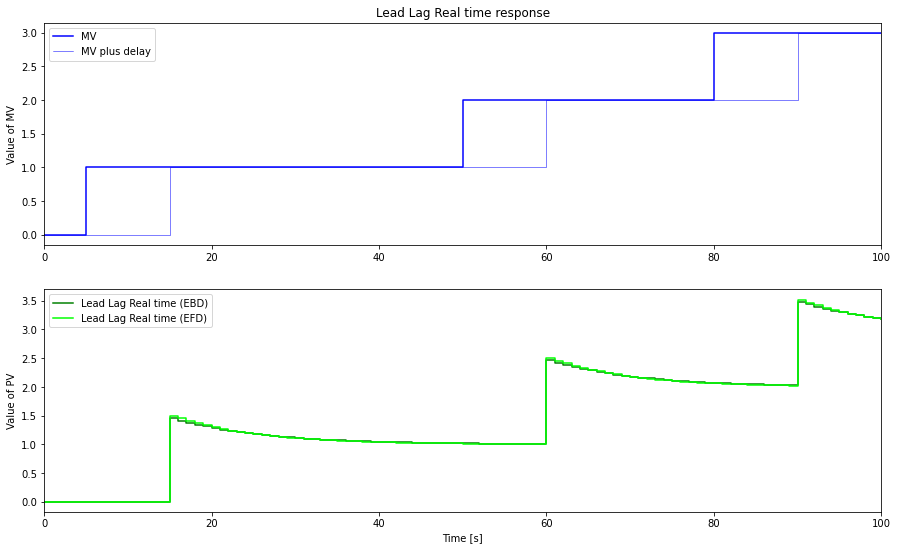

In [3]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlag = 10
Tlead=15
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    
    try : 
        LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    except:
        print ("Trapez is not implemented")
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead Lag Real time response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead Lag Real time (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead Lag Real time (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 

# PID_RT :

In [4]:
TSim = 60
Ts = 0.1
N = int(TSim/Ts) + 1

# SP path
SPPath = {0: 50, 5: 50, 50: 50}

#PV path
PVPath={0: 50, 5: 40, 50: 50}


# MAN path
ManPath = {0: False, TSim: False}

t=[]

SP=[]
SPDelay=[]
PV=[]
PVDelay=[]

PV_EBD = []
PV_EFD = []
PV_TRAP = []

MV_P = []
MV_I = []
MV_D = []
MV = []
E=[]
MV_MAN=[]
MAN = []
MV_FF=[]

In [5]:
# Parameters
Kp = 1
T = 5
Tlead=2
theta = 10
T_I = 10
T_D = 1
alpha = 0.4
MV_MIN = 0 
MV_MAX = 100 

(0.0, 60.0)

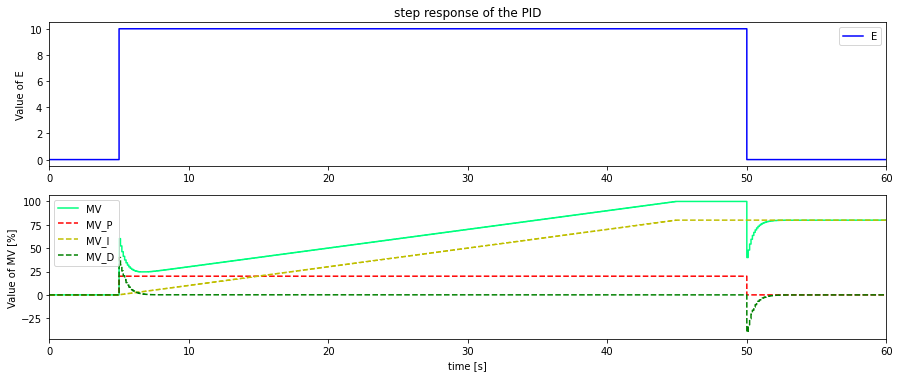

In [6]:
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(ManPath,t,MAN)
    PID_RT(SP,PV,MAN,MV_MAN,MV_FF,2,T_I,T_D,alpha,Ts,MV_MAX,MV_MIN,MV,MV_P,MV_I,MV_D,E,False,0)
    
plt.figure(figsize = (15,9))

plt.subplot(3,1,1)
plt.step(t,E,'b-', label='E', where='post')
plt.legend(loc='best')
plt.title('step response of the PID')
plt.ylabel('Value of E')
plt.xlim([0, TSim])



plt.subplot(3,1,2)
plt.step(t,MV,'springgreen',label='MV',where='post')
plt.step(t,MV_P,'r--',label='MV_P',where='post')
plt.step(t,MV_I,'y--',label='MV_I',where='post')
plt.step(t,MV_D,'g--',label='MV_D',where='post')
plt.ylabel('Value of MV [%]')
plt.xlabel('time [s]')
plt.legend(loc='best')

plt.xlim([0, TSim])




# PID MAN mode

In [7]:
TSim = 60
Ts = 0.1
N = int(TSim/Ts) + 1

# SP path
SPPath = {0: 40,5:60,TSim:60}

#MV PATH
MVPath = {0:0,50:30,70:30}

#PV path
MVmanPath = {0:30,TSim:60}

# MAN path
ManPath = {0:False,20:True,30:False,TSim:False}

t=[]

SP=[]
SPDelay=[]
PV=[]
PVDelay=[]

PV_EBD = []
PV_EFD = []
PV_TRAP = []

MV_P = []
MV_I = []
MV_D = []
MV = []
E=[]
MV_MAN=[]
MAN = []
MV_FF=[]

In [8]:
# Parameters
Kp = 1
T = 5
Tlead=2
theta = 10
T_I = 10
T_D = 1
alpha = 2 
MV_MIN = 0 
MV_MAX = 100 

(0.0, 60.0)

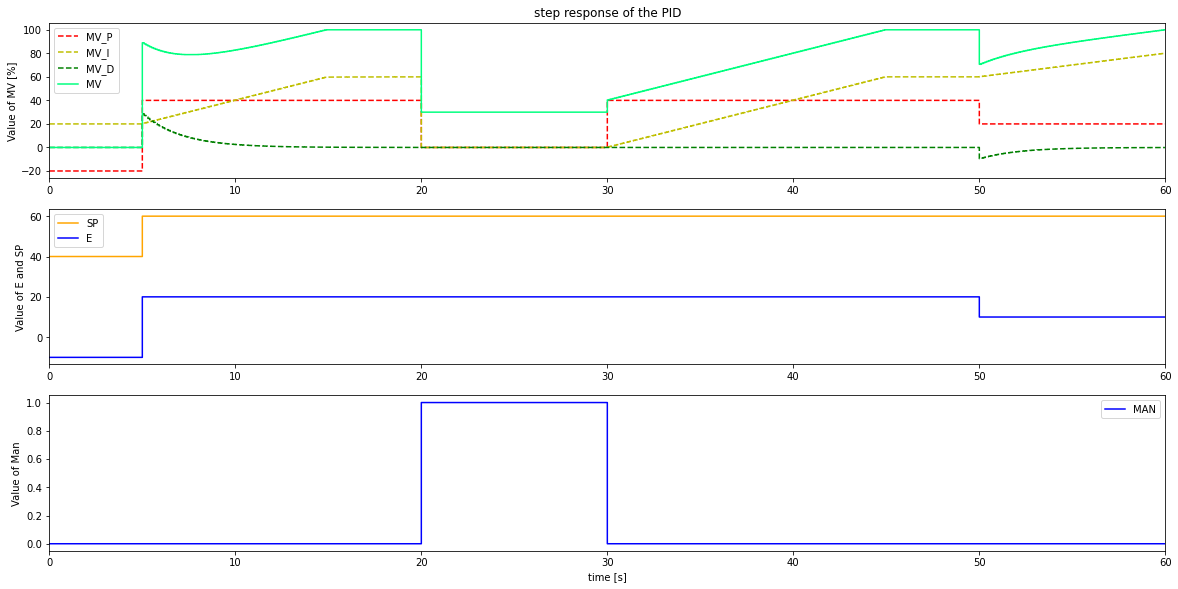

In [9]:
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(ManPath,t,MAN)
    SelectPath_RT(MVmanPath,t,MV_MAN)
    PID_RT(SP,PV,MAN,MV_MAN,MV_FF,2,T_I,T_D,alpha,Ts,MV_MAX,MV_MIN,MV,MV_P,MV_I,MV_D,E,False,0)
    
plt.figure(figsize = (20,20))

plt.subplot(6,1,1)
plt.step(t,MV_P,'r--',label='MV_P',where='post')
plt.step(t,MV_I,'y--',label='MV_I',where='post')
plt.step(t,MV_D,'g--',label='MV_D',where='post')
plt.step(t,MV,'springgreen',label='MV',where='post')
plt.title('step response of the PID')
plt.ylabel('Value of MV [%]')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(6,1,2)
plt.step(t,SP,color = 'orange', label='SP', where='post')
plt.step(t,E,'b-', label='E', where='post')
plt.ylabel('Value of E and SP')
plt.legend(loc='best')
plt.xlim([0, TSim])


plt.subplot(6,1,3)
plt.step(t,MAN,'b-',label='MAN',where='post')
plt.ylabel('Value of Man')
plt.xlabel('time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])


# IMC Tuning 

In [10]:
help(IMC_Tuning)

Help on function IMC_Tuning in module package_LAB:

IMC_Tuning(Kp, T1, T2, theta, gamma, method='SOPDT')
    The function "IMC_Tuning" Calculate and return Kc, TauI, TauD, alpha optimized with the IMC_tuning grid 
    Kp : stactic gain
    T1 : First time constant
    T2 : Seconde time constant
    theta : Delay 
    gamma : agressivity [0,2...0,9] more close to 0,2 more its agressive
    method: Select which methode the IMC_tuning should use
        SOPDT:  Second order plus delay
        FOPDT: First order plus delay



In [11]:
#Parameters:
Kp =  0.553358040201031 # K
T1p =  184.504684095101 # T1
T2p =   1.78243605751087E-07 # T2
thetap =  6.19336906382859 # theta

gamma=0.9 # changement de marge gamma = changement marge de gain et marge de phase 
          # Bonne pratique gama [0,2...0,9] plus gamma est petit plus agressive

In [12]:

print ("IMc tuning premier ordre plus délai")
Kc,Ti,Td= IMC_Tuning(Kp,T1p,T2p,thetap,gamma,'FOPDT')
print('Kc=',Kc,'Ti= ',Ti,'Td= ',Td)

print ("IMc tuning deuxième ordre plus délai")
Kc,Ti,Td = IMC_Tuning(Kp,T1p,T2p,thetap,gamma,'SOPDT')
print('Kc=',Kc,'Ti= ',Ti,'Td= ',Td)


IMc tuning premier ordre plus délai
Kc= 2.0042664853624554 Ti=  187.6013686270153 Td=  3.0455684064809954
IMc tuning deuxième ordre plus délai
Kc= 1.93574448737583 Ti=  184.5046842733446 Td=  1.78243605578892e-07


# Margnins

In [13]:
alpha=0.5 # derivation filter



Kp=0.63
T1p=146.0
T2p=1
thetap=1

indiceGain:  7671
indicePhase:  4855
Gain margin :  41.08121667373565 dB at  0.8745692016830849 rad/s 
Phase margin : 1008.5021304567625 ° at  11.703259386784584 rad/s


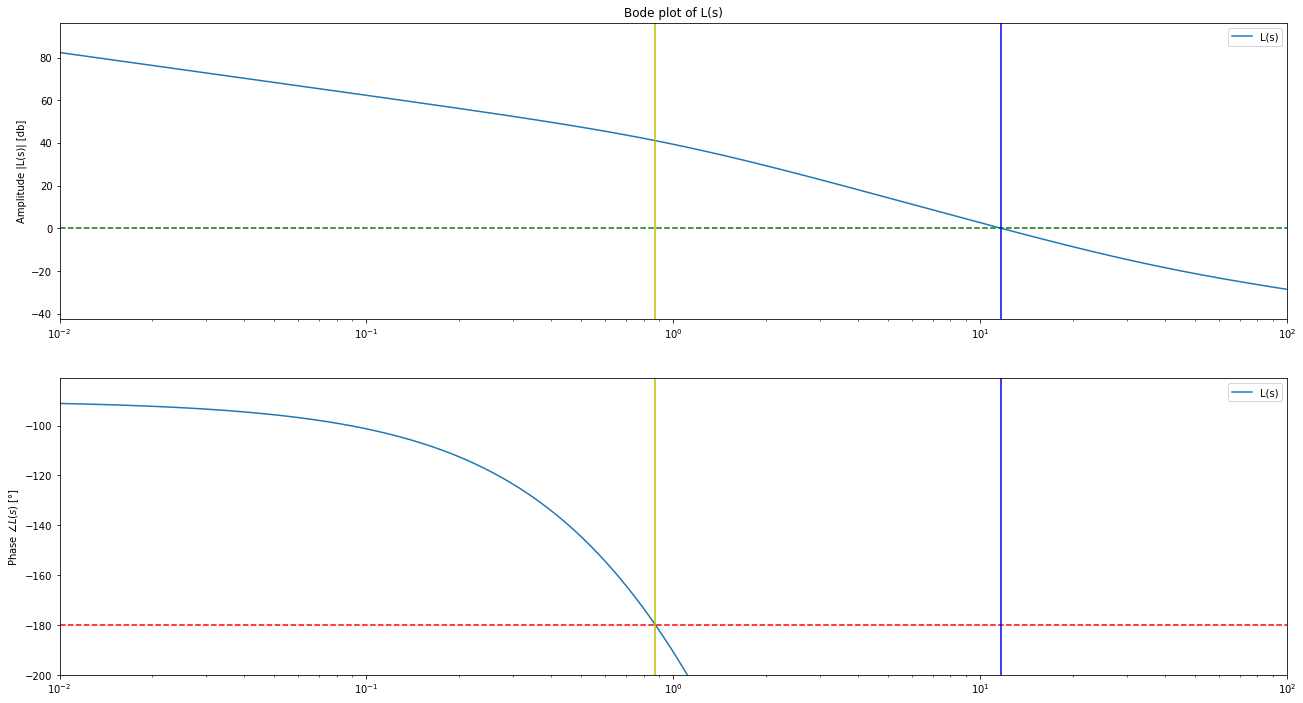

In [14]:
P = Process({})
P.parameters['Kp'] = Kp
P.parameters['theta']=  thetap
P.parameters['Tagd1'] = T1p 
P.parameters['Tlag2'] =  T2p


C = Controller({})

C.parameters['Kc'] = 1.9
C.parameters['Ti'] = 110
C.parameters['Td'] = 10
C.parameters['alpha'] = 1


omega = np.logspace(-2, 2, 10000)
Margins(P,C,omega)
